In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [23]:
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    print '-------正确率：%.2f%%-------' % (100*float(acc.sum()) / a.size)

In [26]:
data = np.loadtxt('../dataset/bipartition.txt', dtype=np.float, delimiter='\t')
x, y = np.split(data, (2,), axis=1)
y = y.ravel()
print('data:\n %s' %data)
print('x:\n %s\n y:\n %s' %(x, y))

data:
 [[ 4.7  1.4  0. ]
 [ 4.5  1.5  0. ]
 [ 4.9  1.5  0. ]
 [ 4.   1.3  0. ]
 [ 4.6  1.5  0. ]
 [ 4.5  1.3  0. ]
 [ 4.7  1.6  0. ]
 [ 3.3  1.   0. ]
 [ 4.6  1.3  0. ]
 [ 3.9  1.4  0. ]
 [ 3.5  1.   0. ]
 [ 4.2  1.5  0. ]
 [ 4.   1.   0. ]
 [ 4.7  1.4  0. ]
 [ 3.6  1.3  0. ]
 [ 4.4  1.4  0. ]
 [ 4.5  1.5  0. ]
 [ 4.1  1.   0. ]
 [ 4.5  1.5  0. ]
 [ 3.9  1.1  0. ]
 [ 4.8  1.8  0. ]
 [ 4.   1.3  0. ]
 [ 4.9  1.5  0. ]
 [ 4.7  1.2  0. ]
 [ 4.3  1.3  0. ]
 [ 4.4  1.4  0. ]
 [ 4.8  1.4  0. ]
 [ 5.   1.7  0. ]
 [ 4.5  1.5  0. ]
 [ 3.5  1.   0. ]
 [ 3.8  1.1  0. ]
 [ 3.7  1.   0. ]
 [ 3.9  1.2  0. ]
 [ 5.1  1.6  0. ]
 [ 4.5  1.5  0. ]
 [ 4.5  1.6  0. ]
 [ 4.7  1.5  0. ]
 [ 4.4  1.3  0. ]
 [ 4.1  1.3  0. ]
 [ 4.   1.3  0. ]
 [ 4.4  1.2  0. ]
 [ 4.6  1.4  0. ]
 [ 4.   1.2  0. ]
 [ 3.3  1.   0. ]
 [ 4.2  1.3  0. ]
 [ 4.2  1.2  0. ]
 [ 4.2  1.3  0. ]
 [ 4.3  1.3  0. ]
 [ 3.   1.1  0. ]
 [ 4.1  1.3  0. ]
 [ 6.   2.5  1. ]
 [ 5.1  1.9  1. ]
 [ 5.9  2.1  1. ]
 [ 5.6  1.8  1. ]
 [ 5.8  2.2  1. ]
 [ 

In [21]:
# 分类器
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
             ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
             ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
myfont = mpl.font_manager.FontProperties(fname='../fonts/simhei.ttf') #自定义字体
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 保存图片时'-' 可能为块

-------正确率：95.00%-------
线性核，C=0.1
支撑向量的数目： [25 25]
支撑向量的系数： [[-0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.0177785  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.1         0.1         0.1         0.1
   0.1         0.1         0.1         0.09707388  0.1         0.1         0.1
   0.1         0.02070462  0.1         0.1         0.1         0.1         0.1
   0.1       ]]
支撑向量： [ 0  1  2  4  5  6  8 11 13 15 16 18 20 22 23 25 26 27 28 33 34 35 36 37 41
 51 53 56 60 61 63 64 66 69 71 73 76 77 79 83 84 87 88 89 91 92 95 96 97 99]
clf.decision_function(x) =  [ -4.99780933e-01  -6.42600667e-01  -1.66535166e-01  -1.42810858e+00
  -5.23584292e-01  -8.33026699e-01  -3.09354900e-01  -2.54686225e+00
  -7.14010324e-01  -1.45191193e+00  -2.308829

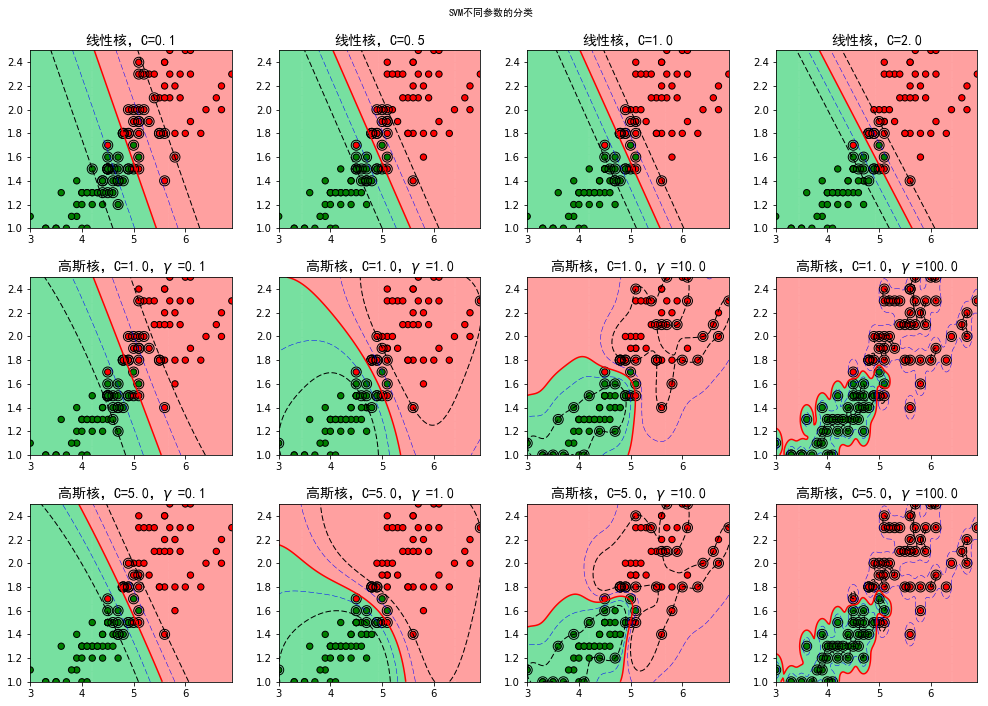

In [25]:
plt.figure(figsize=(14, 10), facecolor='w')
for i, param in enumerate(clf_param):
    clf = svm.SVC(C=param[1], kernel=param[0])
    if param[0] == 'rbf':
        clf.gamma = param[2]
        title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
    else:
        title = u'线性核，C=%.1f' % param[1]

    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)  # 准确率

    # 画图
    print title
    print '支撑向量的数目：', clf.n_support_
    print '支撑向量的系数：', clf.dual_coef_
    print '支撑向量：', clf.support_
    plt.subplot(3, 4, i + 1)
    grid_hat = clf.predict(grid_test)  # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)  # 样本的显示
    plt.scatter(x[clf.support_, 0], x[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')  # 支撑向量
    z = clf.decision_function(grid_test)
    # print 'z = \n', z
    print 'clf.decision_function(x) = ', clf.decision_function(x)
    print 'clf.predict(x) = ', clf.predict(x)
    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title, fontsize=14, fontproperties=myfont)
plt.suptitle(u'SVM不同参数的分类', fontsize=20, fontproperties=myfont)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.savefig('1.png')
plt.show()